In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

# Загрузка данных

In [2]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
from torchvision.datasets import CIFAR10

data_train = CIFAR10('./', download = True, train = True, transform=transform)
data_test = CIFAR10('./', download = True, train = False, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 46222360.22it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [4]:
from torch.utils.data import DataLoader

In [5]:
train_loader = DataLoader(data_train, batch_size=10, shuffle=True)
test_loader = DataLoader(data_test, batch_size=10, shuffle=False)
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

In [6]:
train_images.shape

torch.Size([10, 3, 32, 32])

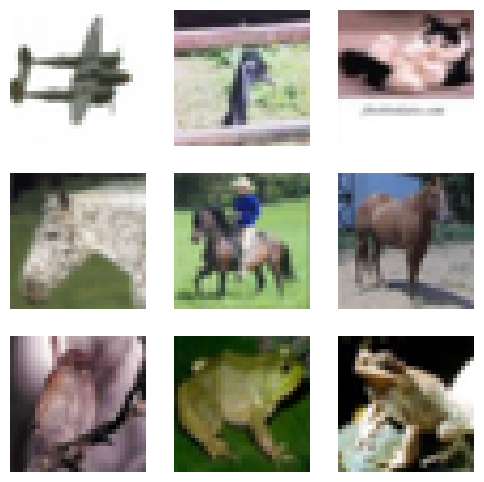

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
axs = axs.flatten()
for i, ax in enumerate(axs):
  ax.axis('off')
  train_image_np = train_images[i].numpy()
  train_image_np = np.transpose(train_image_np, (1, 2, 0))
  ax.imshow(train_image_np)
plt.show()

# Создание сети LeNet со старой архитектурой

In [8]:
from torch import optim

lenet_old = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.Tanh(),
    nn.Linear(in_features=84, out_features=10)
)

In [9]:
loss_vals = {}

In [11]:
def train_model(model, train_loader, test_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        model.eval()
        total_loss = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                total_loss += criterion(output, target).item()
        total_loss /= len(test_loader.dataset)
        print(f'Эпоха {epoch+1}, Ошибка на тестовом наборе: {total_loss}')
        test_losses.append(total_loss)
    return test_losses

In [12]:
loss_vals['Old'] =  train_model(lenet_old, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.15920346811413766
Эпоха 2, Ошибка на тестовом наборе: 0.1445782592535019
Эпоха 3, Ошибка на тестовом наборе: 0.14067206152677536
Эпоха 4, Ошибка на тестовом наборе: 0.1372941910713911
Эпоха 5, Ошибка на тестовом наборе: 0.13722363362014295
Эпоха 6, Ошибка на тестовом наборе: 0.13809939063489438
Эпоха 7, Ошибка на тестовом наборе: 0.13663921529054643
Эпоха 8, Ошибка на тестовом наборе: 0.13419292236864566
Эпоха 9, Ошибка на тестовом наборе: 0.13571115407645704
Эпоха 10, Ошибка на тестовом наборе: 0.13490971187353135


In [13]:
lenet_relu = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [14]:
loss_vals['ReLU'] =  train_model(lenet_relu, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.14612828060984612
Эпоха 2, Ошибка на тестовом наборе: 0.13334961947202684
Эпоха 3, Ошибка на тестовом наборе: 0.12968754611611366
Эпоха 4, Ошибка на тестовом наборе: 0.12691808135807514
Эпоха 5, Ошибка на тестовом наборе: 0.12855366061329843
Эпоха 6, Ошибка на тестовом наборе: 0.12133933722674847
Эпоха 7, Ошибка на тестовом наборе: 0.11751102430224418
Эпоха 8, Ошибка на тестовом наборе: 0.12099828653782606
Эпоха 9, Ошибка на тестовом наборе: 0.12392838254868985
Эпоха 10, Ошибка на тестовом наборе: 0.11848266538381577


In [17]:
lenet_maxpool = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [18]:
loss_vals['MaxPool'] = train_model(lenet_maxpool, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.14270802330970764
Эпоха 2, Ошибка на тестовом наборе: 0.13932756595015525
Эпоха 3, Ошибка на тестовом наборе: 0.12506245333850383
Эпоха 4, Ошибка на тестовом наборе: 0.1200103299677372
Эпоха 5, Ошибка на тестовом наборе: 0.1205643337994814
Эпоха 6, Ошибка на тестовом наборе: 0.116603064930439
Эпоха 7, Ошибка на тестовом наборе: 0.12013910183906555
Эпоха 8, Ошибка на тестовом наборе: 0.1182727501526475
Эпоха 9, Ошибка на тестовом наборе: 0.11929228802025318
Эпоха 10, Ошибка на тестовом наборе: 0.11856233403682709


In [26]:
lenet_new = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0),
    nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [27]:
loss_vals['New'] = train_model(lenet_new, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.14004250921010972
Эпоха 2, Ошибка на тестовом наборе: 0.12198643715381623
Эпоха 3, Ошибка на тестовом наборе: 0.11654870741963387
Эпоха 4, Ошибка на тестовом наборе: 0.10926320788562298
Эпоха 5, Ошибка на тестовом наборе: 0.10874527630507946
Эпоха 6, Ошибка на тестовом наборе: 0.11040921801179647
Эпоха 7, Ошибка на тестовом наборе: 0.10403909008353948
Эпоха 8, Ошибка на тестовом наборе: 0.1104317276597023
Эпоха 9, Ошибка на тестовом наборе: 0.10597494619041681
Эпоха 10, Ошибка на тестовом наборе: 0.1059125783637166


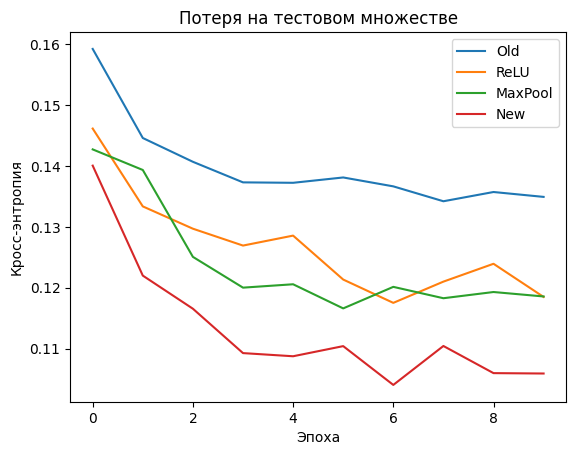

In [30]:
for lenet in loss_vals.keys():
  plt.plot(loss_vals[lenet], label=lenet)
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на тестовом множестве")
plt.legend()
plt.show()